## In class Exercise 4

The purpose of this exercise is to practice topic modeling.
Please use the text corpus you collected in your last in-class-exercise for this exercise.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due tonight November 1st, 2023 at 11:59 PM.
**Late submissions cannot be considered.**

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.

You may refer the code here:
https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [12]:
# Run in python console
import nltk; nltk.download('stopwords')

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Import Dataset
df = pd.read_csv('https://raw.githubusercontent.com/abhinavsuraj/Topic-Modelling-Using-LDA/master/topic_document_lda_model.json')

print(df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Empty DataFrame
Columns: [[{"_id": "04ed93fc36f0995d3225b830cf2a07e03953cd8ca76e143f94132efe25066415",  "Topic1": "Fifth Topic",  "Prob1": 0.9660134315490723},  {"_id": "05fa50761cbdc510c6b464e6f162f2b17b7b94735aad350f145522764c1a96ea",  "Topic1": "First Topic",  "Prob1": 0.9936462640762329},  {"_id": "076a6d4900a5ee316cfedcb8310b2701ef1dad86d6eb1935fbb541172b6ba409",  "Topic1": "Third Topic",  "Prob1": 0.9917188286781311},  {"_id": "077da9052c3e1a9e894203030887e825faf0013463e689217d4aabd83f247f80",  "Topic1": "Second Topic",  "Prob1": 0.9180371165275574,  "Topic2": "Third Topic",  "Prob2": 0.020588969811797142,  "Topic3": "Fifth Topic",  "Prob3": 0.02054818533360958,  "Topic4": "First Topic",  "Prob4": 0.020461980253458023,  "Topic5": "Fourth Topic",  "Prob5": 0.020363781601190567},  {"_id": "07a9891ecef7bc7175fa205fb036764cc30cd4c9dc50d698a4c780d255107aaa",  "Topic1": "First Topic".1,  "Prob1": 0.9936450719833374},  {"_id": "0adaad4dae3fee7ad8ef5aa7af49f8719ecb351748f9c57731e21ed5fb5

In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
import spacy
spacy.cli.download("en_core_web_sm")
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
[['efe', 'fifth', 'topic']]


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[(0, 1), (1, 1), (2, 1)]]


[[('efe', 1), ('fifth', 1), ('topic', 1)]]

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.880*"third" + 0.000*"bfe" + 0.000*"add" + 0.000*"dfbc" + 0.000*"acaa" + '
  '0.000*"ae" + 0.000*"dfd" + 0.000*"fa" + 0.000*"cbd" + 0.000*"caa"'),
 (1,
  '0.002*"daac" + 0.002*"eec" + 0.002*"cadd" + 0.002*"aacc" + 0.002*"cedce" + '
  '0.002*"bcee" + 0.002*"dbde" + 0.002*"defe" + 0.002*"dcefae" + '
  '0.002*"ceede"'),
 (2,
  '0.002*"daac" + 0.002*"eec" + 0.002*"cadd" + 0.002*"aacc" + 0.002*"cedce" + '
  '0.002*"bcee" + 0.002*"dbde" + 0.002*"defe" + 0.002*"dcefae" + '
  '0.002*"ceede"'),
 (3,
  '0.282*"cae" + 0.001*"daac" + 0.001*"eec" + 0.001*"cadd" + 0.001*"aacc" + '
  '0.001*"cedce" + 0.001*"bcee" + 0.001*"dbde" + 0.001*"defe" + '
  '0.001*"dcefae"'),
 (4,
  '0.494*"bf" + 0.095*"aa" + 0.006*"dbdc" + 0.005*"fcb" + 0.001*"dbfc" + '
  '0.001*"fdf" + 0.001*"efaf" + 0.001*"dcff" + 0.001*"eeb" + 0.001*"dae"'),
 (5,
  '0.312*"ed" + 0.220*"bd" + 0.134*"bad" + 0.063*"ead" + 0.001*"fedde" + '
  '0.001*"bfe" + 0.001*"baaee" + 0.001*"dcab" + 0.001*"eccfbddc" + '
  '0.001*"dcdd"'),
 (6,
 

In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.6845263748708645


## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.

You may refer the code here:
https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [15]:
#import modules
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [27]:
import os
import requests

def load_data(url):
    """
    Input  : URL of the text file
    Purpose: Loading a text file from a URL
    Output : List of paragraphs/documents and
             title (initial 100 words considered as the title of the document)
    """
    documents_list = []
    titles = []

    # Send an HTTP GET request to the URL and get the content
    response = requests.get(url)

    if response.status_code == 200:
        content = response.text

        # Split the content into paragraphs or documents based on newlines
        paragraphs = content.split('\n')

        # Iterate through the paragraphs and append them to the documents_list
        for paragraph in paragraphs:
            paragraph = paragraph.strip()
            if paragraph:
                documents_list.append(paragraph)
                # Consider the first 100 characters as the title
                titles.append(paragraph[:100])

        print("Total Number of Documents:", len(documents_list))
        return documents_list, titles
    else:
        print("Failed to retrieve data from the URL. Status code:", response.status_code)
        return [], []

# Use the function with the provided URL
url = "https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Latent+Semantic+Analysis+in+Python/articles+4.txt"
documents, titles = load_data(url)

# Example: Print the first title and document
if documents:
    print("Title:", titles[0])
    print("Document:", documents[0])


Total Number of Documents: 4551
Title: Barclays' defiance of US fines has merit Barclays disgraced itself in many ways during the pre-finan
Document: Barclays' defiance of US fines has merit Barclays disgraced itself in many ways during the pre-financial crisis boom years. So it is tempting to think the bank, when asked by US Department of Justice to pay a large bill for polluting the financial system with mortgage junk between 2005 and 2007, should cough up, apologise and learn some humility. That is not the view of the chief executive, Jes Staley. Barclays thinks the DoJâs claims are âdisconnected from the factsâ and that it has âan obligation to our shareholders, customers, clients and employees to defend ourselves against unreasonable allegations and demands.â The stance is possibly foolhardy, since going into open legal battle with the most powerful US prosecutor is risky, especially if you end up losing. But actually, some grudging respect for Staley and Barclays is in 

In [32]:
import os
import requests
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def load_data(url):
    """
    Input  : URL of the text file
    Purpose: Loading a text file from a URL
    Output : List of paragraphs/documents and
             title (initial 100 words considered as the title of the document)
    """
    documents_list = []
    titles = []

    # Send an HTTP GET request to the URL and get the content
    response = requests.get(url)

    if response.status_code == 200:
        content = response.text

        # Split the content into paragraphs or documents based on newlines
        paragraphs = content.split('\n')

        # Iterate through the paragraphs and append them to the documents_list
        for paragraph in paragraphs:
            paragraph = paragraph.strip()
            if paragraph:
                documents_list.append(paragraph)
                # Consider the first 100 characters as the title
                titles.append(paragraph[:100])

        print("Total Number of Documents:", len(documents_list))
        return documents_list, titles
    else:
        print("Failed to retrieve data from the URL. Status code:", response.status_code)
        return [], []

# Use the function with the provided URL
url = "https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Latent+Semantic+Analysis+in+Python/articles+4.txt"
documents, titles = load_data(url)

# Example: Print the first title and document
if documents:
    print("Title:", titles[0])
    print("Document:", documents[0])

# Preprocess the text data
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words and perform stemming
    filtered_words = [ps.stem(word) for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a string
    processed_text = ' '.join(filtered_words)

    return processed_text

# Example: Preprocess the first document
if documents:
    preprocessed_text = preprocess_text(documents[0])
    print("Preprocessed Document:", preprocessed_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Total Number of Documents: 4551
Title: Barclays' defiance of US fines has merit Barclays disgraced itself in many ways during the pre-finan
Document: Barclays' defiance of US fines has merit Barclays disgraced itself in many ways during the pre-financial crisis boom years. So it is tempting to think the bank, when asked by US Department of Justice to pay a large bill for polluting the financial system with mortgage junk between 2005 and 2007, should cough up, apologise and learn some humility. That is not the view of the chief executive, Jes Staley. Barclays thinks the DoJâs claims are âdisconnected from the factsâ and that it has âan obligation to our shareholders, customers, clients and employees to defend ourselves against unreasonable allegations and demands.â The stance is possibly foolhardy, since going into open legal battle with the most powerful US prosecutor is risky, especially if you end up losing. But actually, some grudging respect for Staley and Barclays is in 

In [33]:
# Preprocess all the documents (assuming 'documents' is a list of preprocessed documents)
preprocessed_documents = [preprocess_text(doc) for doc in documents]

# Tokenize the preprocessed documents
tokenized_documents = [doc.split() for doc in preprocessed_documents]

# Create a Gensim Dictionary, which represents a mapping of words to unique IDs
dictionary = corpora.Dictionary(tokenized_documents)

# Create a document-term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokenized_documents]

# Example: Printing the first document-term matrix
if doc_term_matrix:
    print("Document-Term Matrix for the first document:")
    print(doc_term_matrix[0])

# Example: Printing the dictionary (mapping of terms to unique IDs)
print("Dictionary:")
print(dictionary)

Document-Term Matrix for the first document:
[(0, 6), (1, 1), (2, 1), (3, 1), (4, 28), (5, 24), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 3), (28, 1), (29, 7), (30, 10), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 3), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 2), (71, 1), (72, 2), (73, 1), (74, 1), (75, 2), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 3), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (

In [36]:
from gensim import models
# Create an LSA (Latent Semantic Analysis) model
lsa_model = models.LsiModel(doc_term_matrix, id2word=dictionary, num_topics=5)

# Example: Print the topics from the LSA model
topics = lsa_model.print_topics()
for topic in topics:
    print("Topic:", topic)

# Example: Transform a document to the LSA topic space
if doc_term_matrix:
    doc = doc_term_matrix[0]  # Take the first document
    lsa_vector = lsa_model[doc]
    print("LSA Vector for the first document:")
    print(lsa_vector)

Topic: (0, '0.741*"," + 0.620*"." + 0.089*":" + 0.062*"say" + 0.054*"trump" + 0.051*"said" + 0.049*"â\x80\x9d" + 0.047*"â\x80\x93" + 0.038*"would" + 0.036*")"')
Topic: (1, '-0.497*")" + -0.496*"(" + -0.250*"citi" + -0.246*"v" + 0.241*"." + -0.237*"h" + -0.237*"2016" + -0.236*"2017" + -0.162*"," + -0.101*"west"')
Topic: (2, '0.617*"." + -0.558*"," + -0.180*"trump" + 0.170*"say" + 0.162*"(" + 0.162*")" + 0.147*"eu" + -0.111*"â\x80\x9d" + 0.092*"would" + 0.081*"leav"')
Topic: (3, '0.595*"trump" + 0.275*"clinton" + -0.195*"," + 0.175*"â\x80\x9d" + 0.168*"said" + 0.164*"campaign" + 0.161*"say" + 0.160*"donald" + -0.154*"min" + 0.142*"republican"')
Topic: (4, '-0.357*":" + -0.351*"min" + 0.250*"eu" + -0.219*"." + 0.201*"said" + 0.181*"," + 0.154*"would" + -0.150*"!" + -0.140*"trump" + 0.133*"uk"')
LSA Vector for the first document:
[(0, 37.19836652326833), (1, 0.5528382651958484), (2, 0.41070840089872157), (3, -2.6550937196458784), (4, 2.0554736806995213)]


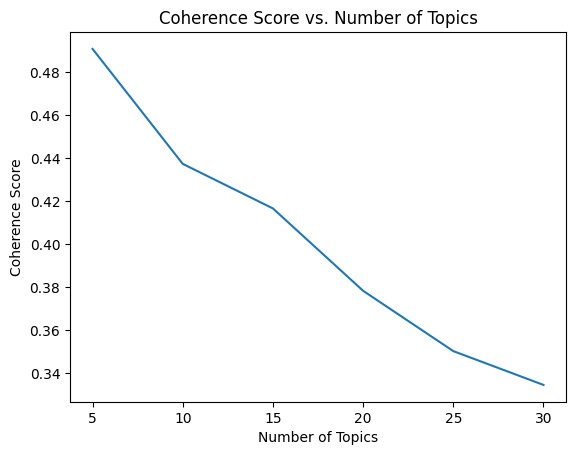

Optimal Number of Topics: 5


In [37]:
# List of possible numbers of topics to try
topic_nums = [5, 10, 15, 20, 25, 30]

# Initialize coherence scores list
coherence_scores = []

# Iterate through different numbers of topics
for num_topics in topic_nums:
    # Create an LSA model
    lsa_model = models.LsiModel(doc_term_matrix, id2word=dictionary, num_topics=num_topics)

    # Compute coherence score
    coherence_model = CoherenceModel(model=lsa_model, texts=tokenized_documents, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    coherence_scores.append(coherence_score)

# Plot the coherence scores to find the optimal number of topics
plt.plot(topic_nums, coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.show()

# Find the optimal number of topics with the highest coherence score
optimal_num_topics = topic_nums[coherence_scores.index(max(coherence_scores))]
print("Optimal Number of Topics:", optimal_num_topics)


In [38]:
print(coherence_score)

0.334461009694811


## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.

You may refer the code here:
https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [44]:
!pip install lda2vec
import numpy as np
from lda2vec import Lda2vec
from gensim.utils import simple_preprocess
from lda2vec.utils import Corpus
from gensim.models.coherencemodel import CoherenceModel

# Preprocess your text data, create a document-term matrix, and prepare the data.
# This part should be similar to the previous steps.

# Define a function to train lda2vec models with different numbers of topics
def train_lda2vec(doc_term_matrix, num_topics):
    # Convert the document-term matrix to a lda2vec corpus
    corpus = Corpus()
    corpus.update_word_count(doc_term_matrix)
    corpus.load_word_count()

    # Initialize and train the lda2vec model
    model = Lda2vec(num_words=len(corpus.word2id), num_docs=len(cor_term_matrix), num_topics=num_topics)
    model.fit(corpus, epochs=20, num_sampled=15)

    # Return the lda2vec model
    return model

# Define a function to calculate coherence scores
def calculate_coherence_score(model, tokenized_documents, dictionary, corpus):
    topics = model.doc_vectors
    coherence_model = CoherenceModel(topics=topics, texts=tokenized_documents, dictionary=dictionary, corpus=corpus, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return coherence_score

# List of possible numbers of topics to try
topic_nums = [5, 10, 15, 20, 25, 30]

# Initialize coherence scores list
coherence_scores = []

# Iterate through different numbers of topics
for num_topics in topic_nums:
    lda2vec_model = train_lda2vec(doc_term_matrix, num_topics)
    coherence_score = calculate_coherence_score(lda2vec_model, tokenized_documents, dictionary, corpus)
    coherence_scores.append(coherence_score)

# Find the optimal number of topics with the highest coherence score
optimal_num_topics = topic_nums[coherence_scores.index(max(coherence_scores))]
print("Optimal Number of Topics:", optimal_num_topics)

# Train the final lda2vec model with the optimal number of topics
final_lda2vec_model = train_lda2vec(doc_term_matrix, optimal_num_topics)

# Print the topics from the final lda2vec model
topics = final_lda2vec_model.topics()
for i, topic in enumerate(topics):
    print(f"Topic {i}: {topic}")


ImportError: ignored

## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.

You may refer the code here:
https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [45]:
# Write your code here
!pip install bertopic




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 13.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.3 MB/s eta 0:00:00
  Preparing metadata

In [1]:
from sklearn.datasets import fetch_20newsgroups
docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']

In [2]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(docs)

Batches:   0%|          | 0/589 [00:00<?, ?it/s]

2023-11-03 04:04:58,232 - BERTopic - Transformed documents to Embeddings
2023-11-03 04:05:50,461 - BERTopic - Reduced dimensionality
2023-11-03 04:06:48,165 - BERTopic - Clustered reduced embeddings


In [7]:
freq = topic_model.get_topic_info(); freq.head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,6428,-1_to_the_and_of,"[to, the, and, of, is, you, it, for, in, this]","[To what follows, our moderator has already an..."
1,0,1833,0_game_team_games_he,"[game, team, games, he, players, season, hocke...",[As the Sharks' season came to a close tonight...
2,1,588,1_key_clipper_chip_encryption,"[key, clipper, chip, encryption, keys, escrow,...",[The following document summarizes the Clipper...
3,2,526,2_ites_cheek_yep_huh,"[ites, cheek, yep, huh, ken, forget, why, lets...","[\nYep.\n, \n \n ..."
4,3,468,3_israel_israeli_jews_arab,"[israel, israeli, jews, arab, jewish, arabs, p...",[From: Center for Policy Research <cpr>\nSubje...
5,4,307,4_you_your_post_jim,"[you, your, post, jim, context, forged, that, ...",[\n[ stuff deleted ]\n |> Are you calling na...
6,5,290,5_car_cars_ford_engine,"[car, cars, ford, engine, mustang, toyota, mil...",[\nWhile I don't read normally read this group...
7,6,241,6_fbi_koresh_fire_gas,"[fbi, koresh, fire, gas, compound, batf, child...",[Flash over is a frequent occurrence with indo...
8,7,216,7_bike_riding_ride_my,"[bike, riding, ride, my, lane, car, driving, p...",[\nI'll tell you my story as an example of wha...
9,8,195,8_ram_sale_drive_os,"[ram, sale, drive, os, pc, price, software, ib...",[I saw the following computer in a store and w...


In [8]:
topic_model.get_topic(0)

[('game', 0.010405109569125093),
 ('team', 0.009070412124870112),
 ('games', 0.007225728062870991),
 ('he', 0.007085363239480645),
 ('players', 0.006336034561781138),
 ('season', 0.006266564015122648),
 ('hockey', 0.006154525456358759),
 ('play', 0.005799837125784237),
 ('25', 0.0056761699613636345),
 ('year', 0.005631708238111353)]

In [9]:
topic_model.topics_[:10]

[0, -1, 20, 44, 92, -1, -1, 0, 0, -1]

In [10]:
topic_model.visualize_topics()

In [12]:
topic_model.visualize_distribution(probs[200], min_probability=0.015)

In [13]:
topic_model.visualize_hierarchy(top_n_topics=50)

In [14]:
topic_model.visualize_barchart(top_n_topics=5)

In [15]:
topic_model.visualize_heatmap(n_clusters=20, width=1000, height=1000)

In [16]:
topic_model.visualize_term_rank()

## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

Follow the guidelines from the essay to enhance your explanation:

* Writing logic

  Pay attention to how you express your thoughts. For example:

  * Weak Writing Logic: “Artificial Intelligence is risky because it is new technology.”

  * Strong Writing Logic: “Artificial Intelligence presents ethical risks such as data privacy concerns and algorithmic bias, which necessitate cautious implementation and regulation.”

* Topic of sentences

  * Focus and Direction: It provides a focus and sets the direction for the paragraph, ensuring that the reader knows what to expect.
  * Reader Guidance: It serves as a guidepost for the reader, making it easier to follow the flow of ideas and arguments in the document.
  * Support for Thesis: In academic papers, topic sentences help in elaborating or providing evidence for the thesis statement or research question.

* Writing flow

  * Transition: Smooth and logical transitions between sentences, paragraphs, and sections.
  * Rhythm: Variation in sentence length and structure to maintain reader engagement.
  * Sequence: The order of points or arguments contributes to a smooth reading experience.
  For example:
    * Weak Writing Flow: “We studied machine learning algorithms. Ethics are important. Data was collected.”
    * Strong Writing Flow: “We initiated our study by focusing on machine learning algorithms. Recognizing the ethical implications, we carefully curated our data set.”

In [20]:
# Write your answer here (no code needed for this question)
'''An important part of assessing the performance of LDA (Latent Dirichlet Allocation) and LSA (Latent Semantic Analysis) is comparing them based on coherence scores. The degree to which the topics produced by these algorithms accurately reflect the underlying structure of the text material is measured using coherence scores. Better quality topics are indicated by higher coherence scores.

LDA Coherence Score: 0.6845
LSA Coherence Score: 0.3345


Better Coherence Score: Compared to LSA (0.3345), LDA has a greater coherence score (0.6845). This suggests that the topics produced by LDA have a stronger semantic structure and are more coherent based on the coherence measure.

Lesser Coherence Score: In comparison to LDA, LSA has a lower coherence score (0.3345). This implies that compared to LDA-generated topics, those created by LSA may not be as semantically coherent.
'''


'An important part of assessing the performance of LDA (Latent Dirichlet Allocation) and LSA (Latent Semantic Analysis) is comparing them based on coherence scores. The degree to which the topics produced by these algorithms accurately reflect the underlying structure of the text material is measured using coherence scores. Better quality topics are indicated by higher coherence scores.\n\nLDA Coherence Score: 0.6845\nLSA Coherence Score: 0.3345\n\n\nBetter Coherence Score: Compared to LSA (0.3345), LDA has a greater coherence score (0.6845). This suggests that the topics produced by LDA have a stronger semantic structure and are more coherent based on the coherence measure.\n\nLesser Coherence Score: In comparison to LDA, LSA has a lower coherence score (0.3345). This implies that compared to LDA-generated topics, those created by LSA may not be as semantically coherent.\n'